In [293]:
# Import Dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')

train_path = r'drive/My Drive/Cancer Mammography/data_training.csv'
test_path = r'drive/My Drive/Cancer Mammography/data_testing.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [294]:
# Read CSV
import pandas as pd

data_train = pd.read_csv(train_path)
data_test = pd.read_csv(test_path)

In [295]:
# Check Data Train
data_train.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [296]:
#  Check Data Test
data_test.head(10)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,84799002,14.540,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,0.3700,1.0330,2.879,32.55,0.005607,0.04240,0.04741,0.01090,0.01857,0.005466,17.46,37.13,124.10,943.2,0.1678,0.6577,0.70260,0.17120,0.4218,0.13410
1,848406,14.680,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,0.4727,1.2400,3.195,45.40,0.005718,0.01162,0.01998,0.01109,0.01410,0.002085,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216
2,84862001,16.130,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,0.5692,1.0730,3.854,54.18,0.007026,0.02501,0.03188,0.01297,0.01689,0.004142,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420
3,849014,19.810,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,0.7582,1.0170,5.865,112.40,0.006494,0.01893,0.03391,0.01521,0.01356,0.001997,27.32,30.88,186.80,2398.0,0.1512,0.3150,0.53720,0.23880,0.2768,0.07615
4,8510426,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.01460,0.02387,0.01315,0.01980,0.002300,15.11,19.26,99.70,711.2,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259
5,8510653,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,0.1852,0.7477,1.383,14.67,0.004097,0.01898,0.01698,0.00649,0.01678,0.002425,14.50,20.49,96.09,630.5,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183
6,8510824,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,0.2773,0.9768,1.909,15.70,0.009606,0.01432,0.01985,0.01421,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773
7,8511133,15.340,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,0.07032,0.4388,0.7096,3.384,44.91,0.006789,0.05328,0.06446,0.02252,0.03672,0.004394,18.07,19.08,125.10,980.9,0.1390,0.5954,0.63050,0.23930,0.4667,0.09946
8,851509,21.160,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,0.1769,0.05278,0.6917,1.1270,4.303,93.99,0.004728,0.01259,0.01715,0.01038,0.01083,0.001987,29.17,35.59,188.00,2615.0,0.1401,0.2600,0.31550,0.20090,0.2822,0.07526
9,852552,16.650,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.09170,0.1995,0.06330,0.8068,0.9017,5.455,102.60,0.006048,0.01882,0.02741,0.01130,0.01468,0.002801,26.46,31.56,177.00,2215.0,0.1805,0.3578,0.46950,0.20950,0.3613,0.09564


In [297]:
# Check Data Summary
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       450 non-null    int64  
 1   diagnosis                450 non-null    object 
 2   radius_mean              450 non-null    float64
 3   texture_mean             450 non-null    float64
 4   perimeter_mean           450 non-null    float64
 5   area_mean                450 non-null    float64
 6   smoothness_mean          450 non-null    float64
 7   compactness_mean         450 non-null    float64
 8   concavity_mean           450 non-null    float64
 9   concave points_mean      450 non-null    float64
 10  symmetry_mean            450 non-null    float64
 11  fractal_dimension_mean   450 non-null    float64
 12  radius_se                450 non-null    float64
 13  texture_se               450 non-null    float64
 14  perimeter_se             4

In [298]:
# Remove 'id' Column
data_train.pop('id')

0        842302
1        842517
2      84300903
3      84348301
4      84358402
         ...   
445      926424
446      926682
447      926954
448      927241
449       92751
Name: id, Length: 450, dtype: int64

In [299]:
# Check Data Statistics
data_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,14.074876,19.314222,91.559089,649.496889,0.095151,0.102311,0.085594,0.046927,0.179751,0.062658,0.392844,1.213478,2.778987,38.772344,0.007004,0.025483,0.031860,0.011678,0.020488,0.003837,16.150224,25.601778,106.393200,869.166222,0.130490,0.250336,0.265098,0.111393,0.287324,0.083691
std,3.473983,4.453025,23.930079,345.793868,0.013992,0.052853,0.078083,0.037956,0.026921,0.007239,0.256611,0.564855,1.847430,41.827228,0.003028,0.017991,0.031736,0.006329,0.008151,0.002821,4.824737,6.249623,33.424733,574.435014,0.022268,0.159066,0.210733,0.065239,0.061126,0.018621
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.009947,0.000895,8.678000,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,11.662500,16.090000,74.902500,416.450000,0.084757,0.062195,0.027105,0.019640,0.160850,0.057485,0.230375,0.821225,1.598250,17.820000,0.005091,0.012760,0.014298,0.007487,0.015185,0.002184,12.885000,20.900000,83.730000,507.425000,0.114300,0.139725,0.108750,0.062960,0.247850,0.070667
50%,13.200000,18.760000,85.250000,538.550000,0.094400,0.089065,0.057490,0.032300,0.177900,0.061365,0.314400,1.088000,2.242000,23.865000,0.006302,0.020460,0.024990,0.010770,0.018725,0.003119,14.785000,25.245000,96.560000,666.750000,0.129800,0.207200,0.207950,0.095630,0.277950,0.079080
75%,15.832500,21.835000,104.025000,787.050000,0.103975,0.129675,0.121450,0.066323,0.195400,0.065802,0.466875,1.466750,3.216500,43.842500,0.008042,0.032798,0.042550,0.014770,0.023365,0.004584,18.302500,29.297500,123.725000,1031.750000,0.143475,0.333600,0.379250,0.158000,0.314100,0.091765
max,27.420000,39.280000,186.900000,2501.000000,0.163400,0.345400,0.410800,0.191300,0.290600,0.097440,2.547000,4.885000,18.650000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.218400,1.058000,1.252000,0.290300,0.663800,0.207500


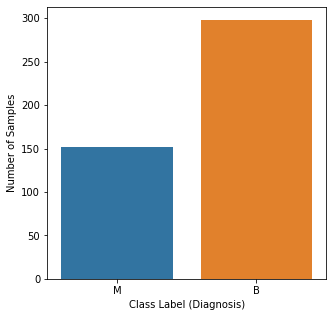

In [300]:
# Check Number of Samples
import matplotlib.pyplot as plt              
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x='diagnosis', data=data_train)
plt.xlabel("Class Label (Diagnosis)")
plt.ylabel("Number of Samples")
plt.show()

In [301]:
# Check Null Values
data_train.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [302]:
# Check Duplicate Values
data_train = data_train.drop_duplicates()
dup_check = data_train.duplicated().any()

data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 449
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                450 non-null    object 
 1   radius_mean              450 non-null    float64
 2   texture_mean             450 non-null    float64
 3   perimeter_mean           450 non-null    float64
 4   area_mean                450 non-null    float64
 5   smoothness_mean          450 non-null    float64
 6   compactness_mean         450 non-null    float64
 7   concavity_mean           450 non-null    float64
 8   concave points_mean      450 non-null    float64
 9   symmetry_mean            450 non-null    float64
 10  fractal_dimension_mean   450 non-null    float64
 11  radius_se                450 non-null    float64
 12  texture_se               450 non-null    float64
 13  perimeter_se             450 non-null    float64
 14  area_se                  4

In [303]:
# Train Test Split
import numpy as np
from sklearn.model_selection import train_test_split

y = np.array(data_train.pop('diagnosis'))  
X = np.array(data_train)     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [304]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [305]:
# SVM
# from sklearn import svm

# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# clf.best_params_

# {'C': 1, 'kernel': 'linear'}
# Akurasi : 0.9851851851851852
# Sensitivity : 0.9642857142857143
# Specificity : 1.0

In [306]:
# KNN
# from sklearn.neighbors import KNeighborsClassifier

# parameters = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
# neigh = KNeighborsClassifier()
# clf = GridSearchCV(neigh, parameters)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# clf.best_params_

# {'n_neighbors': 9}
# Akurasi : 0.9407407407407408
# Sensitivity : 0.8928571428571429
# Specificity : 0.9746835443037974

In [307]:
# MLP
from sklearn.neural_network import MLPClassifier

parameters = {'activation':('tanh', 'relu'), 'hidden_layer_sizes':[500], 'max_iter':[500]}
mlp = MLPClassifier()
clf = GridSearchCV(mlp, parameters)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

clf.best_params_

# {'activation': 'tanh', 'hidden_layer_sizes': 500, 'max_iter': 500}
# Akurasi : 0.9925925925925926
# Sensitivity : 1.0
# Specificity : 0.9873417721518988

{'activation': 'tanh', 'hidden_layer_sizes': 500, 'max_iter': 500}

In [308]:
# Accuracy, Sensitivity, Specificity
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tn + tp) / (tn+fp+fn+tp)
sensitivity = tp / (tp + fn)
specificity = tn / (fp + tn)
print("Akurasi : " + str(accuracy))
print("Sensitivity : " + str(sensitivity))
print("Specificity : " + str(specificity))

Akurasi : 0.9925925925925926
Sensitivity : 1.0
Specificity : 0.9873417721518988


In [309]:
# Predict Data Test
fitur_test = data_test[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']].to_numpy()

y_pred_test = clf.predict(fitur_test)
print(y_pred_test)

['M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M'
 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B'
 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B']


In [310]:
# Result DataFrame
output = pd.DataFrame(y_pred_test)

ID = data_test.iloc[:, 0]
ID = pd.DataFrame(ID)

hasil = pd.concat([ID, output], axis=1)
hasil.to_csv(r'drive/My Drive/hasil_klasifikasi_kresna.csv')